# Global Pollution Analysis and Energy Recovery

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import (r2_score, mean_absolute_error, mean_squared_error,
                            accuracy_score, classification_report, confusion_matrix, recall_score, f1_score, precision_score)

In [2]:
%matplotlib inline

# Phase 1: Data Collection and Exploratory Data Analysis (EDA)

## Step 1 - Data Import and Preprocessing

### Dataset

In [3]:
# importing dataset 
df = pd.read_csv('Global_Pollution_Analysis.csv')
df.head()

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,Hungary,2005,272.70,124.27,51.95,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,Singapore,2001,86.72,60.34,117.22,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,Romania,2016,91.59,83.36,121.72,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15
3,Cook Islands,2018,280.61,67.16,93.58,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51
4,Djibouti,2008,179.16,127.53,121.55,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37


### Handluing Missing Data

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 13 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Country                                 200 non-null    object 
 1   Year                                    200 non-null    int64  
 2   Air_Pollution_Index                     200 non-null    float64
 3   Water_Pollution_Index                   200 non-null    float64
 4   Soil_Pollution_Index                    200 non-null    float64
 5   Industrial_Waste (in tons)              200 non-null    float64
 6   Energy_Recovered (in GWh)               200 non-null    float64
 7   CO2_Emissions (in MT)                   200 non-null    float64
 8   Renewable_Energy (%)                    200 non-null    float64
 9   Plastic_Waste_Produced (in tons)        200 non-null    float64
 10  Energy_Consumption_Per_Capita (in MWh)  200 non-null    float6

#### Insight: No missing values in any column. Every column has 200 rows

### Data Transformation

In [5]:
# Normalize or scale pollution indices (air, water, and soil).
df_transform= df.copy(deep = True)
scaler = StandardScaler()

pollution_columns = ['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index']
df_transform[pollution_columns] = scaler.fit_transform(df_transform[pollution_columns])
df_transform.head()

,Country,Year,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
0,Hungary,2005,1.376167,0.193880,-0.619764,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,20972.96
1,Singapore,2001,-1.403578,-1.153098,1.028744,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,34850.41
2,Romania,2016,-1.330788,-0.668076,1.142400,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,57773.15
3,Cook Islands,2018,1.494394,-1.009403,0.431675,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,21837.51
4,Djibouti,2008,-0.021926,0.262567,1.138106,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,41379.37


In [6]:
# Encode categorical features such as Country and Year using label encoding or one-hot encoding
df_transform = pd.get_dummies(df_transform, columns=['Country','Year'], drop_first=False)
df_transform.head()

,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),...,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019
0,1.376167,0.193880,-0.619764,94802.83,158.14,5.30,41.11,37078.88,12.56,42.22,...,False,False,False,False,False,False,False,False,False,False
1,-1.403578,-1.153098,1.028744,56283.92,498.04,6.34,36.44,33128.20,5.23,137.25,...,False,False,False,False,False,False,False,False,False,False
2,-1.330788,-0.668076,1.142400,56256.02,489.51,49.69,9.38,18803.46,13.15,124.47,...,False,False,False,False,False,False,True,False,False,False
3,1.494394,-1.009403,0.431675,74864.73,145.18,8.91,18.97,9182.27,0.78,67.80,...,False,False,False,False,False,False,False,False,True,False
4,-0.021926,0.262567,1.138106,76862.06,40.38,14.93,34.00,39235.12,12.84,186.52,...,False,False,False,False,False,False,False,False,False,False


## Step 2 - Exploratory Data Analysis (EDA)

### Descriptive Statistics

In [8]:
df.drop(columns=['Year']).describe()

,Air_Pollution_Index,Water_Pollution_Index,Soil_Pollution_Index,Industrial_Waste (in tons),Energy_Recovered (in GWh),CO2_Emissions (in MT),Renewable_Energy (%),Plastic_Waste_Produced (in tons),Energy_Consumption_Per_Capita (in MWh),Population (in millions),GDP_Per_Capita (in USD)
count,200.00000,200.000000,200.000000,200.00000,200.000000,200.000000,200.000000,200.000000,200.00000,200.000000,200.000000
mean,180.62695,115.068100,76.488550,52891.68150,260.448700,24.878100,27.799700,24492.893550,9.43575,104.271300,35307.602400
std,67.07331,47.580911,39.692727,27224.49169,147.141923,14.470892,12.361879,14421.356002,5.57567,56.906574,19481.714455
min,50.30000,31.130000,11.150000,1019.37000,11.730000,1.920000,5.040000,542.950000,0.53000,2.320000,1298.700000
25%,134.97250,74.550000,40.895000,31201.97250,118.355000,11.220000,17.700000,12843.882500,4.58250,60.960000,19525.020000
50%,183.38500,112.305000,78.600000,55299.15000,273.140000,25.355000,29.170000,24121.540000,9.22500,104.965000,35043.325000
75%,237.42500,157.477500,109.212500,74805.82500,384.957500,38.550000,37.072500,36516.232500,13.99750,150.930000,51629.547500
max,297.95000,199.320000,149.230000,99739.36000,499.980000,49.690000,49.560000,49852.280000,19.98000,198.820000,69143.140000


### Correlation Analysis

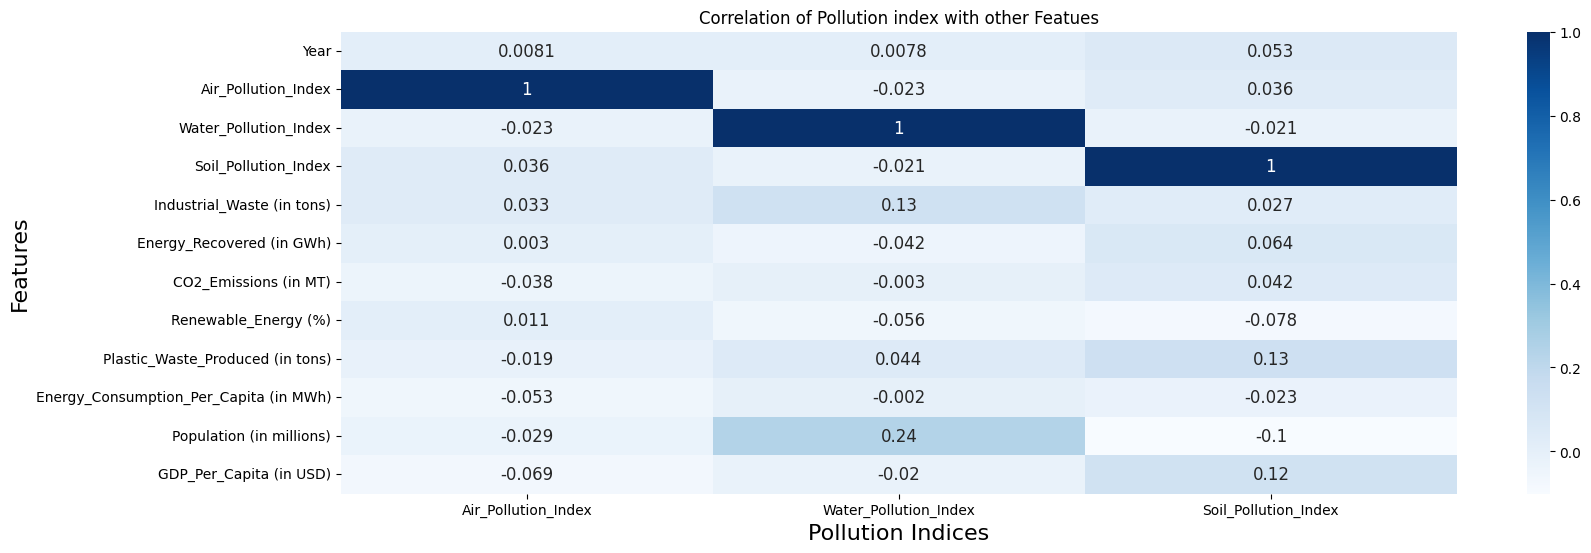

In [9]:
corr_features = df.corr(numeric_only=True)

plt.figure(figsize=(18,6))
plt.tight_layout()
sns.heatmap(corr_features[pollution_columns], cmap='Blues', annot=True, annot_kws={'size':12})
plt.title('Correlation of Pollution index with other Featues')
plt.ylabel('Features', fontsize=16)
plt.xlabel('Pollution Indices', fontsize=16)
plt.savefig('Pollution Index vs other features.png')

### Visualizations

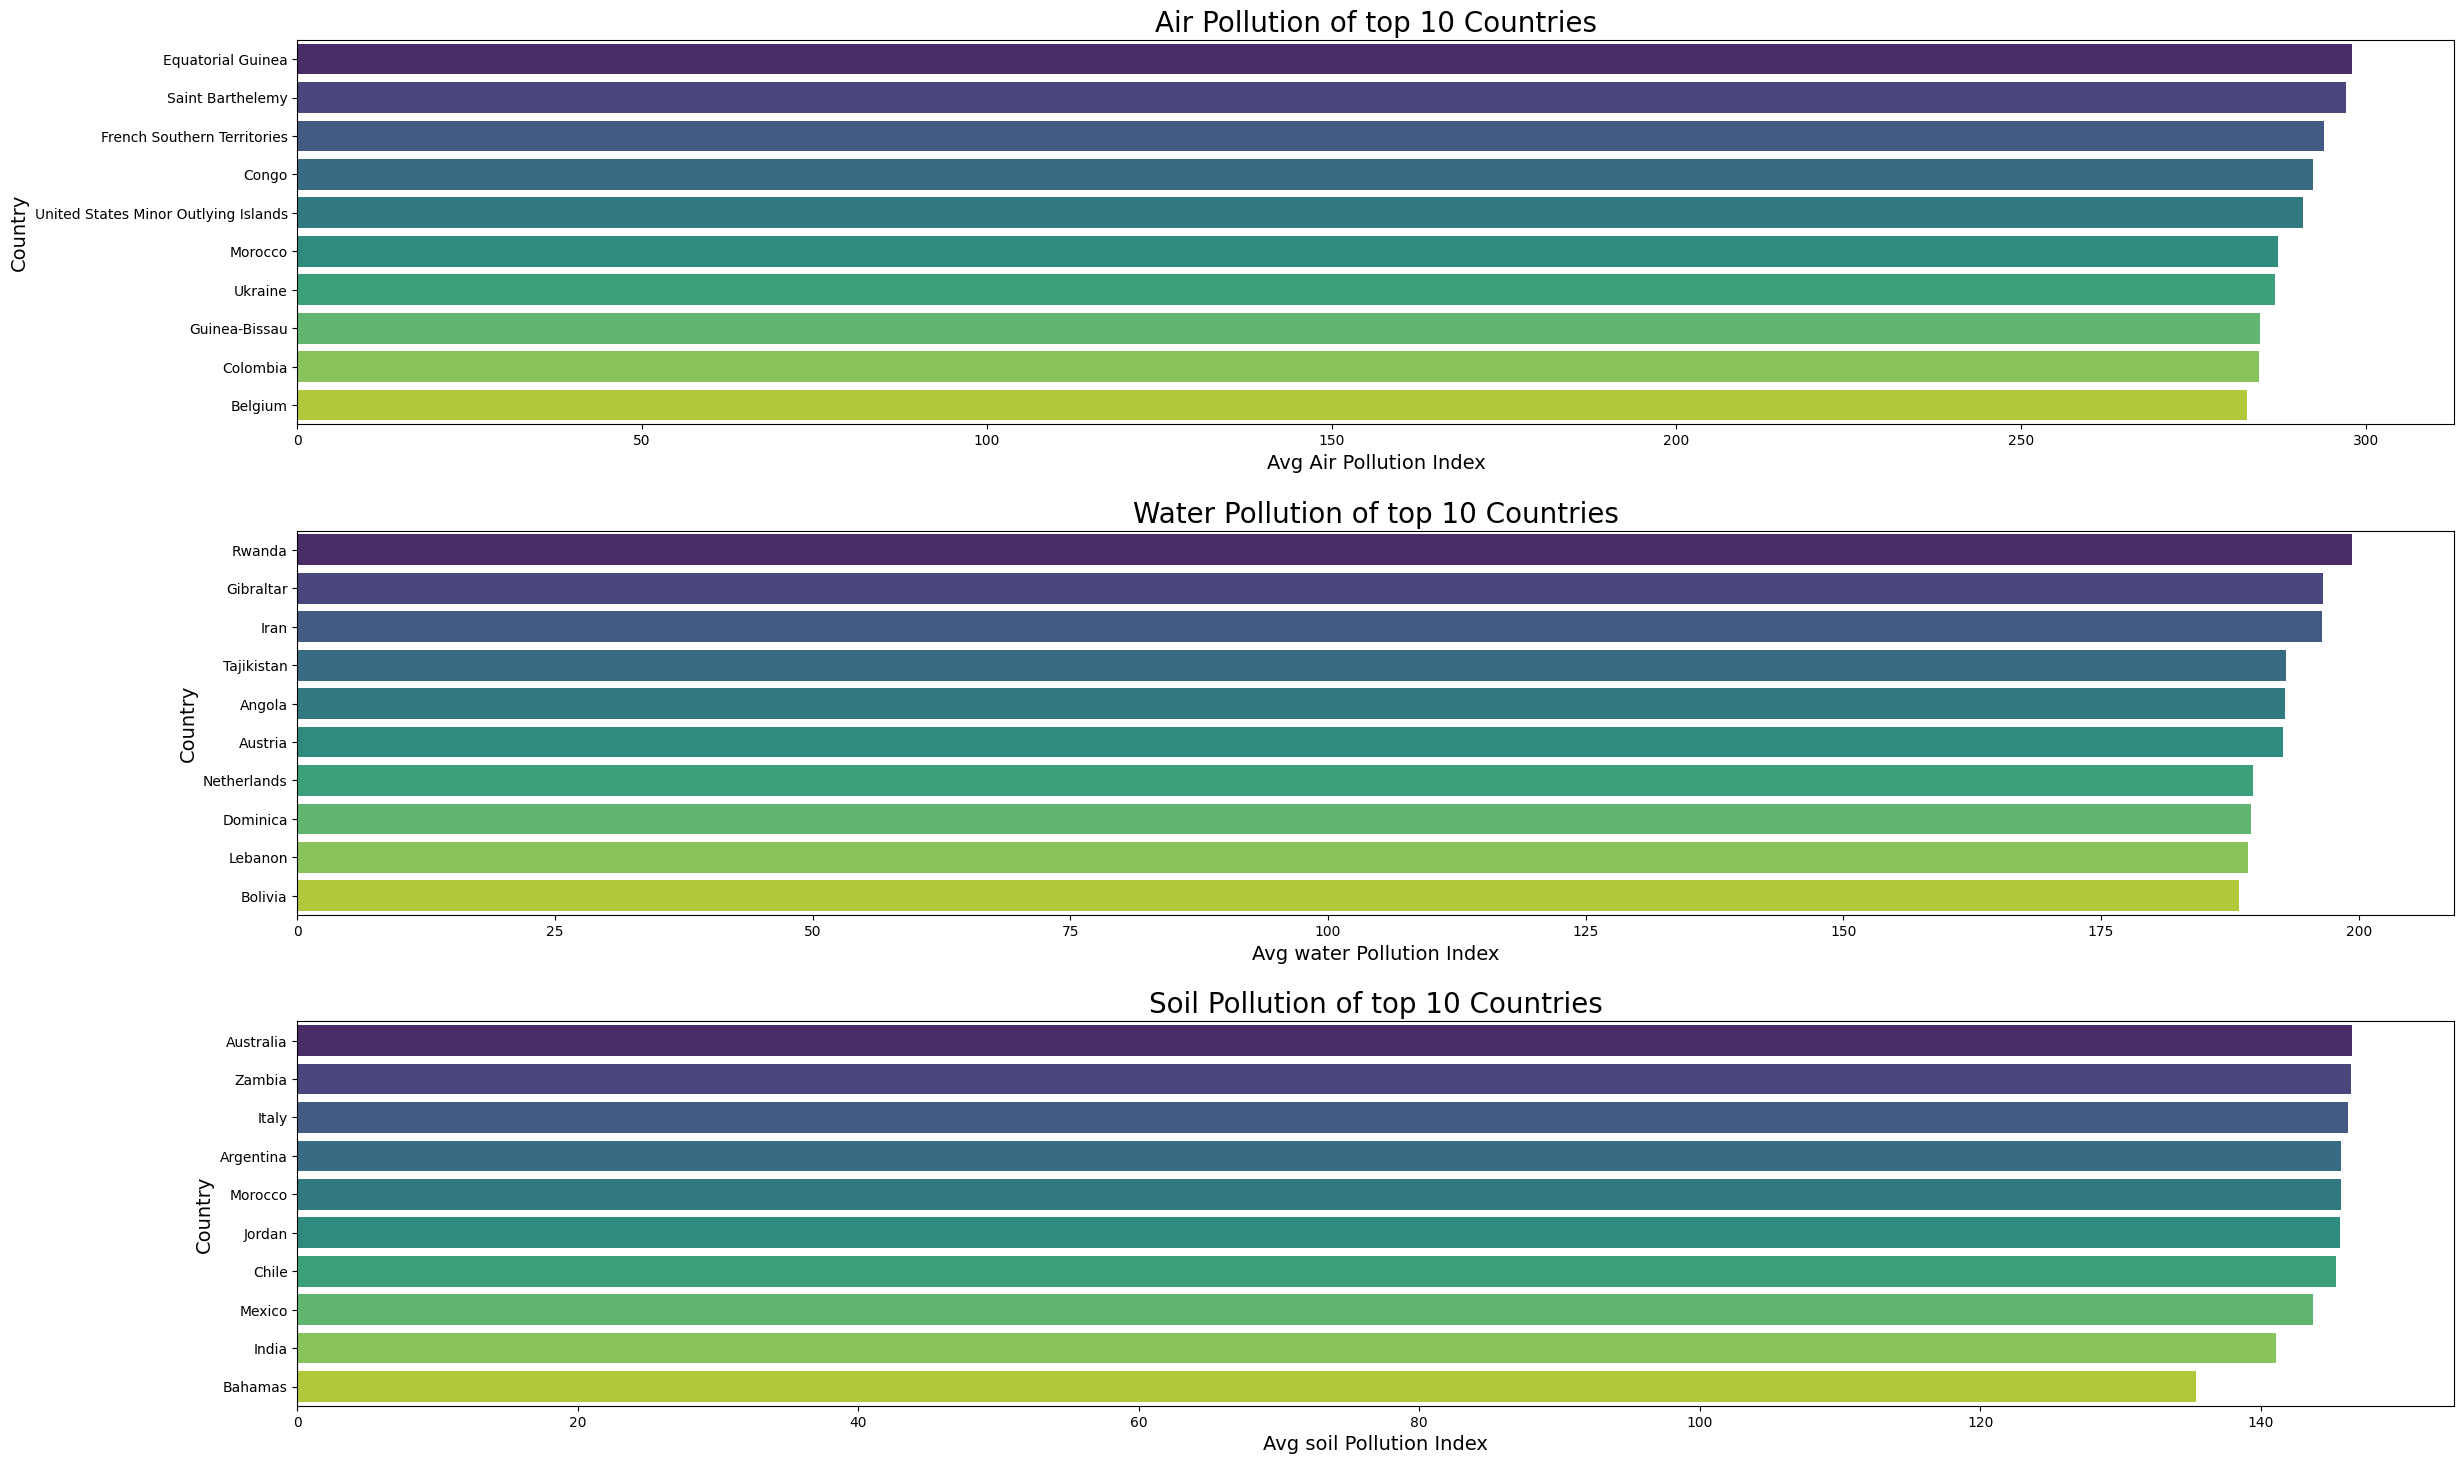

In [10]:
# bar chart of pollution over various countries

# calculating the average pollution index group by countries
avg_air_pollution = df.groupby('Country')['Air_Pollution_Index'].mean().sort_values(ascending=False).head(10)
avg_water_pollution = df.groupby('Country')['Water_Pollution_Index'].mean().sort_values(ascending=False).head(10)
avg_soil_pollution = df.groupby('Country')['Soil_Pollution_Index'].mean().sort_values(ascending=False).head(10)

# creating a pollution list to group all the indices
pollution_list = [
    ("Air Pollution", round(avg_air_pollution,2), "Avg Air Pollution Index"),
    ("Water Pollution", round(avg_water_pollution,2), "Avg water Pollution Index"),
    ("Soil Pollution", round(avg_soil_pollution,2), "Avg soil Pollution Index"),
]


# Plotting the pollutions by country
fig, ax = plt.subplots(3, 1, figsize=(25,15))
ax = ax.flatten()

for i, (title, data, xlabel) in enumerate(pollution_list):
    sns.barplot(x=data.values, y=data.index, palette='viridis', hue=data.index, ax=ax[i])
    ax[i].set_title(f"{title} of top 10 Countries", fontsize=20)
    ax[i].set_ylabel("Country", fontsize=14)
    ax[i].set_xlabel(xlabel, fontsize=14)

plt.savefig('Average Air Pollutuon Index of top 10 Countries.jpeg')
plt.tight_layout(pad=2)
plt.show()

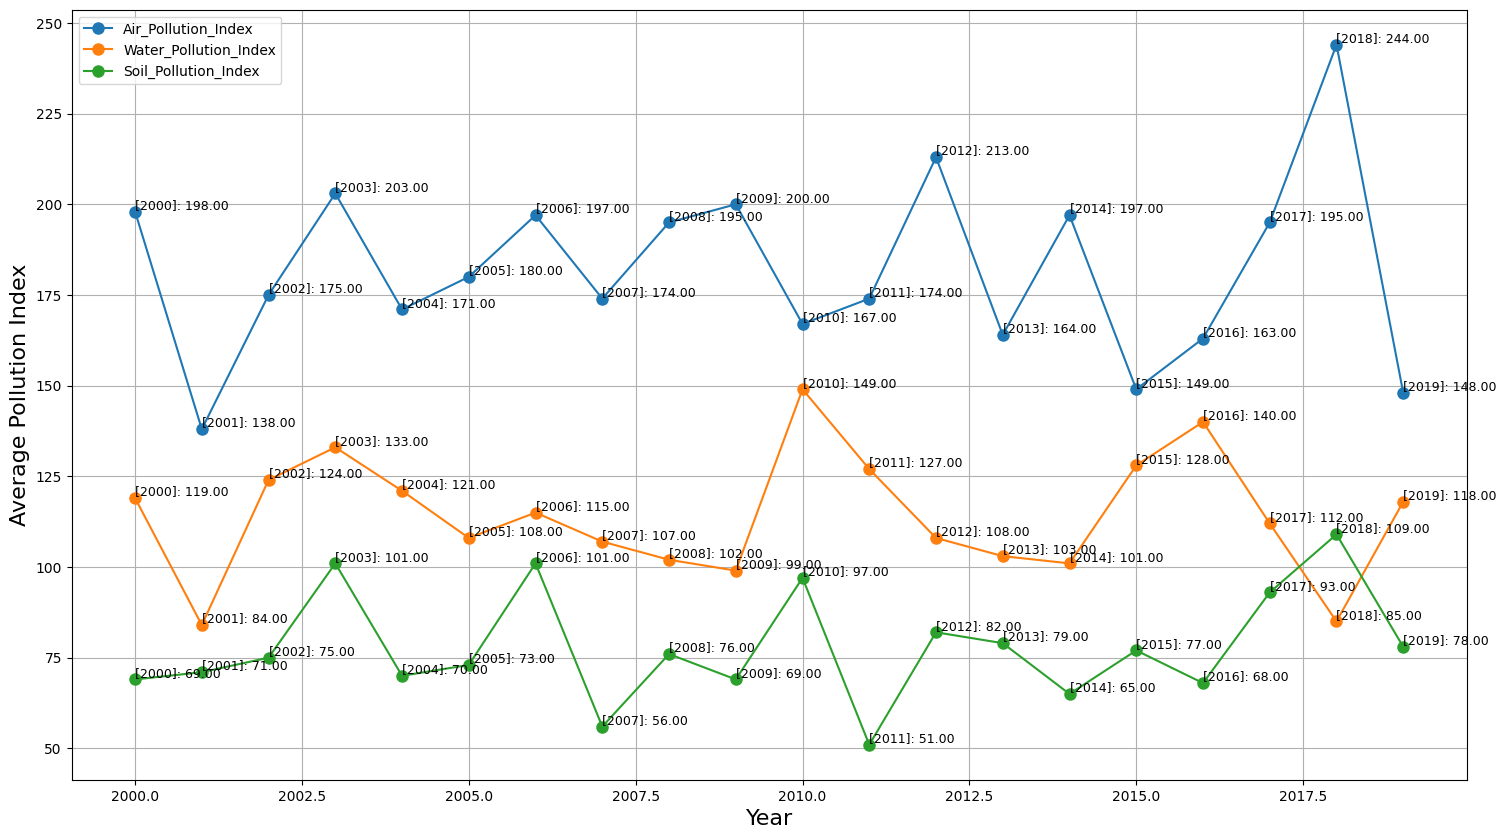

In [11]:
# Line chart showing all average Pollution Index over the year

# Calculating mean of every pollution index
pollution_columns = ['Air_Pollution_Index', 'Water_Pollution_Index', 'Soil_Pollution_Index']
avg_pollution_year = round(df.groupby('Year')[pollution_columns].mean(),0)

# plotting all three pollution indices
fig, ax = plt.subplots(figsize=(18, 10))  
for col in avg_pollution_year.columns:
    plt.plot(avg_pollution_year.index, avg_pollution_year[col], marker="o", markersize=8, label=col)

    for x, y in zip(avg_pollution_year.index, avg_pollution_year[col]):
        plt.text(x, y, f'[{x}]: {y:.2f}', ha='left', va='bottom', fontsize=9)

plt.grid(True)
plt.legend()
plt.xlabel("Year", fontsize = 16)
plt.ylabel("Average Pollution Index", fontsize = 16)
plt.savefig("Average Pollution Index over the years")
plt.show()

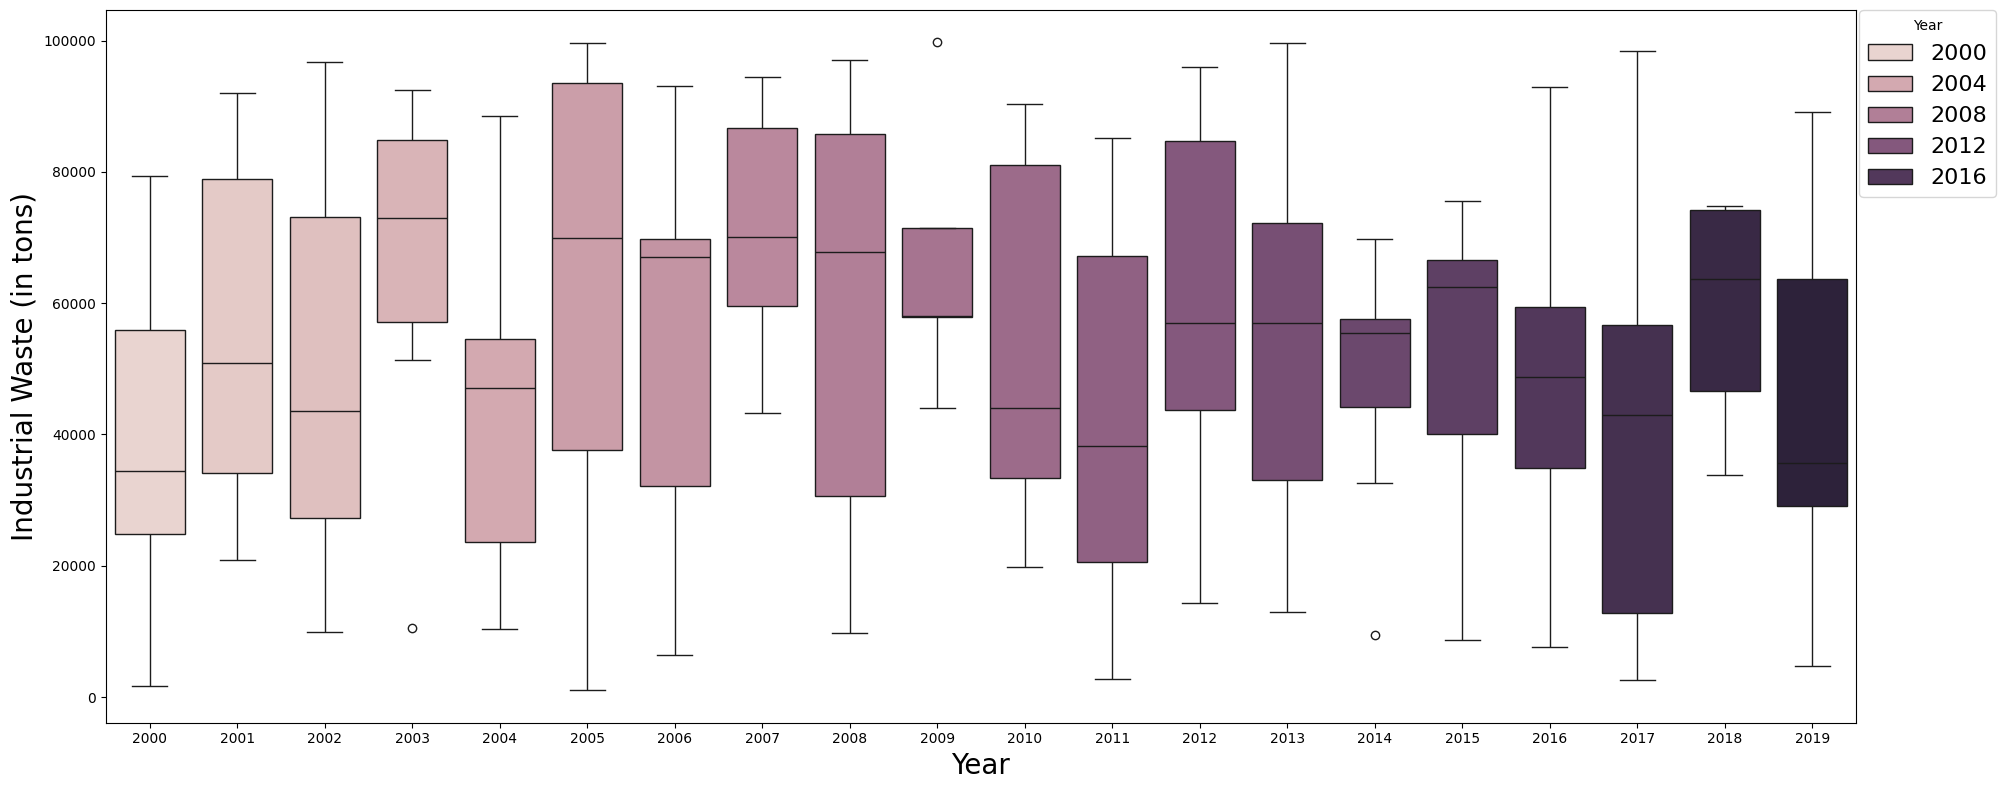

In [12]:
# Boxplot of Industrial Waste in tons over the years

fig, ax = plt.subplots(figsize=(20, 8))  
sns.boxplot(data=df, x='Year', y='Industrial_Waste (in tons)', hue='Year')
ax.legend(title='Year', bbox_to_anchor=(1.08, 1), loc='upper right', borderaxespad=0, fontsize=16)
ax.set_xlabel("Year", fontsize=20)
ax.set_ylabel("Industrial Waste (in tons)", fontsize=20)
plt.tight_layout()
plt.savefig('Industrial_Waste (in tons) over the years')

## Step 3 - Feature Engineering

### Yearly Trends

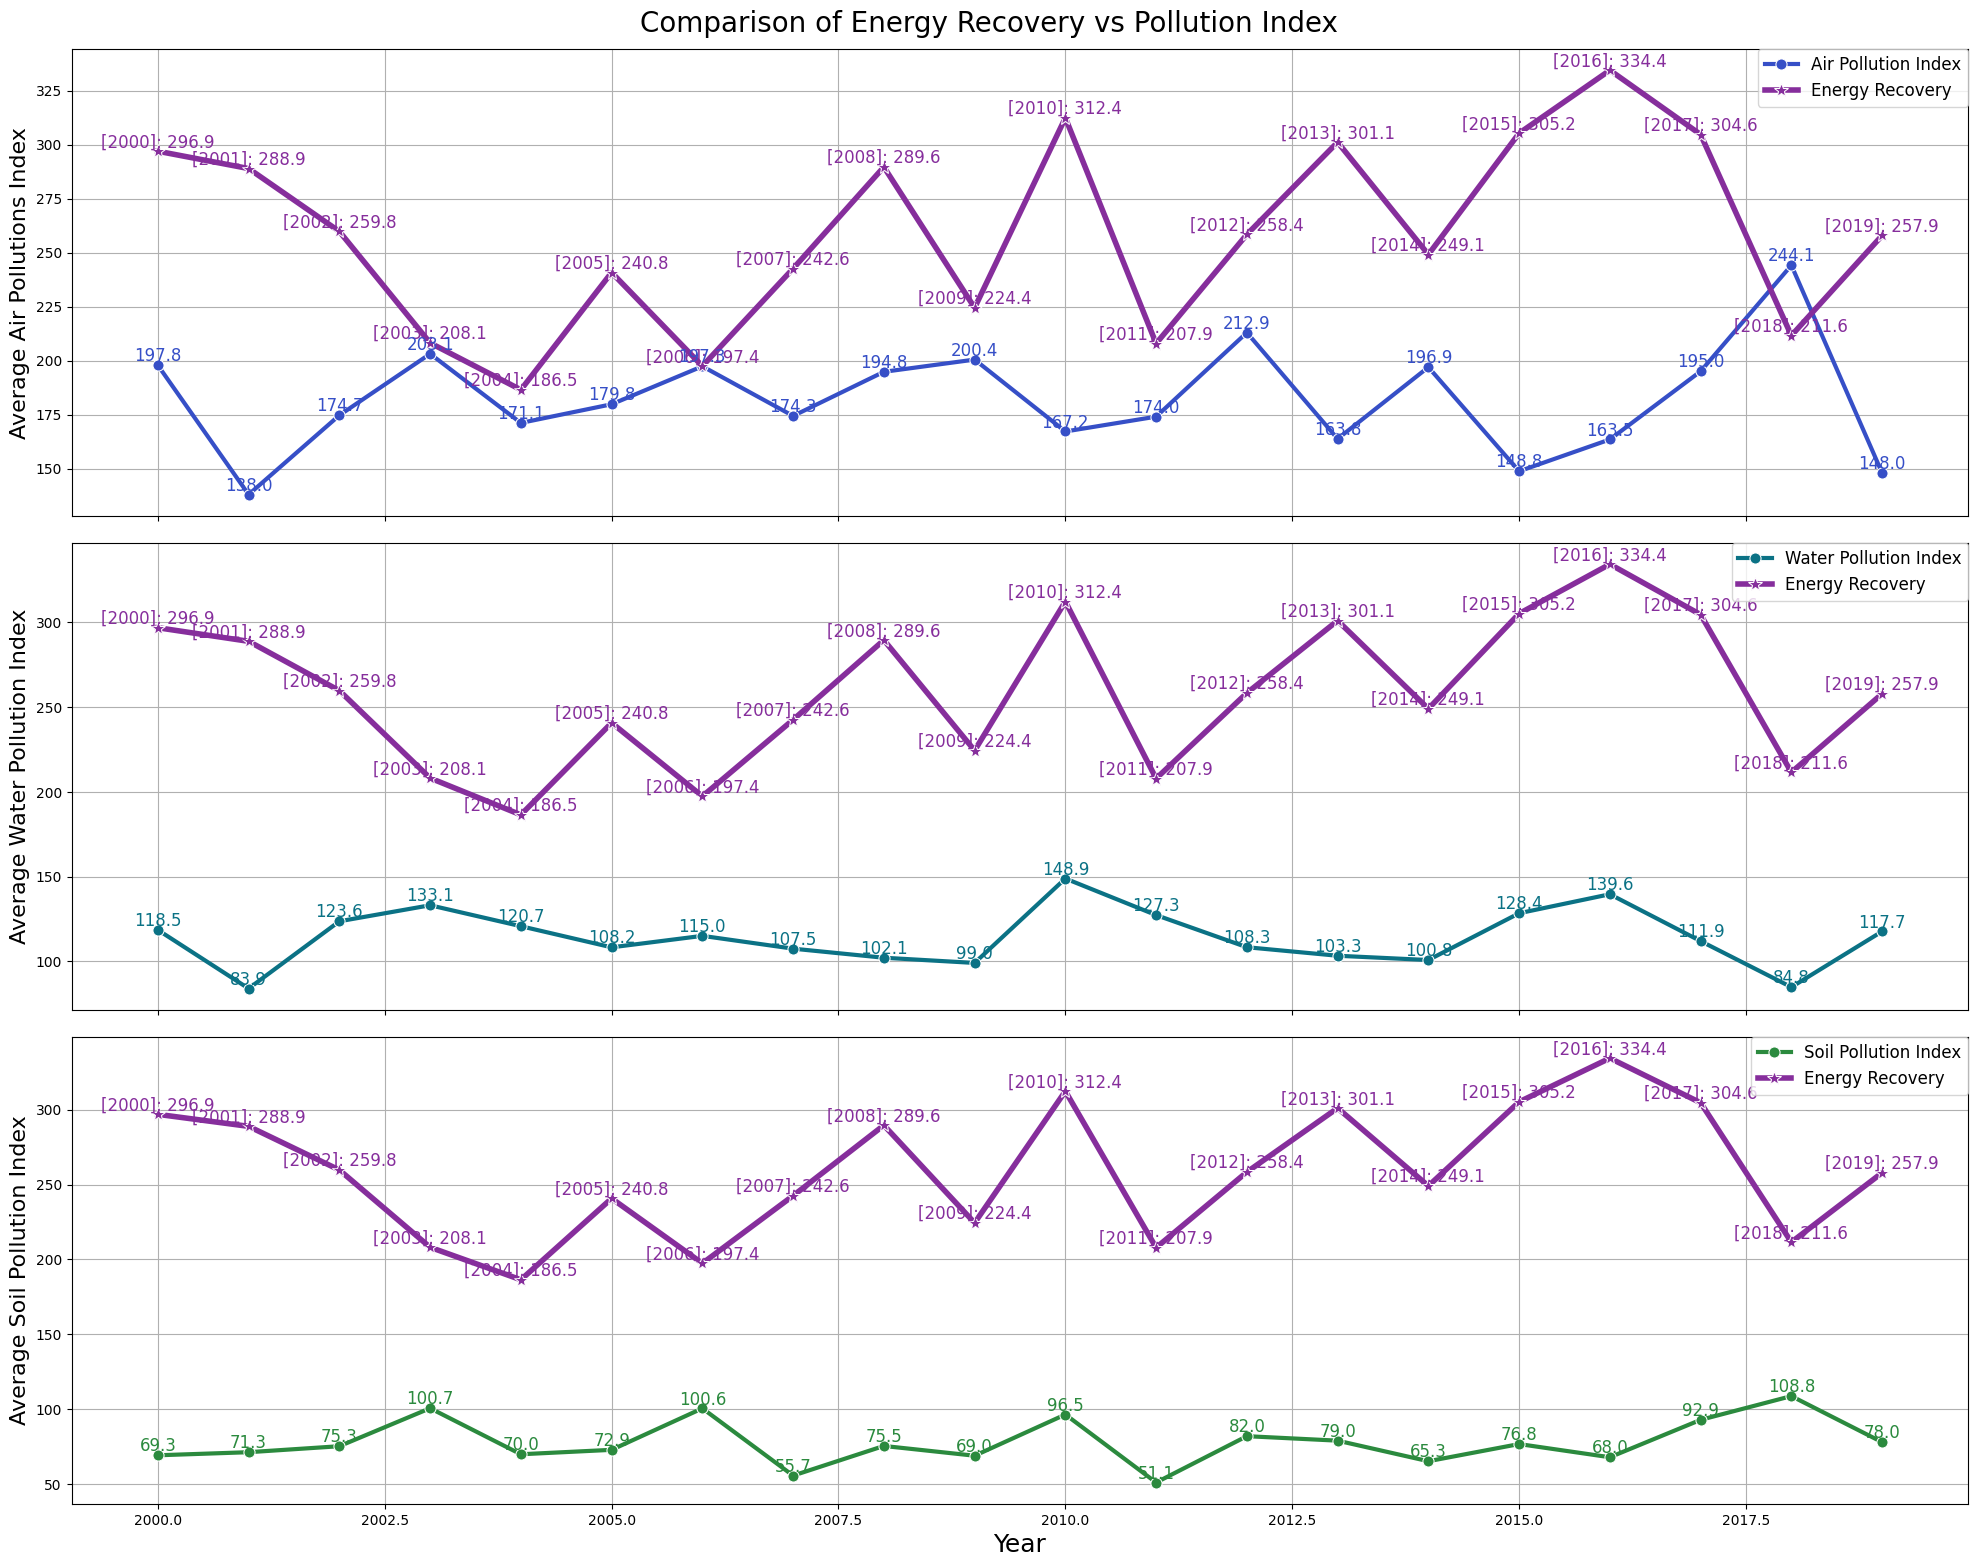

In [13]:
# Getting all the Pollution indices and Energy Recovered features 
yearly_pollution_trends = round(df.groupby('Year')[[
    'Air_Pollution_Index', 
    'Water_Pollution_Index', 
    'Soil_Pollution_Index',
    'Energy_Recovered (in GWh)'
]].mean().reset_index(),2)

# Plotting all the pollution indices compared with Energy Recovery
fig, axes = plt.subplots(3,1, figsize=(20,16), sharex=True)
axes = axes.flatten()  # flatten the 2D axes array to 1D for easy indexingcolumns = df_feature_eng.columns
columns = yearly_pollution_trends.columns[1:4]
plotting_aes = {
    'colors' : ['#364fc7','#0b7285','#2b8a3e', '#862e9c'],
    'y_labels' : ['Air Pollutions', 'Water Pollution', 'Soil Pollution'],
    'legend': ['Air Pollution', 'Water Pollution', 'Soil Pollution']
}

for i, col in enumerate(columns):
    sns.lineplot(yearly_pollution_trends, x='Year', y = columns[i], ax=axes[i], color=plotting_aes['colors'][i], marker="o", markersize=8, label=f"{plotting_aes['legend'][i]} Index", linewidth=3)
    sns.lineplot(yearly_pollution_trends, x='Year', y = 'Energy_Recovered (in GWh)', ax=axes[i], color=plotting_aes['colors'][3], marker="*", markersize=10, label='Energy Recovery', linewidth=4)

    for x, y in zip(yearly_pollution_trends['Year'], yearly_pollution_trends['Energy_Recovered (in GWh)']):
        axes[i].text(x, y, f'[{x}]: {y:.1f}', color=plotting_aes['colors'][3], fontsize=12, ha='center', va='bottom')

    for x, y in zip(yearly_pollution_trends['Year'], yearly_pollution_trends[col]):
        axes[i].text(x, y, f'{y:.1f}', color=plotting_aes['colors'][i], fontsize=12, ha='center', va='bottom')

    axes[i].set_ylabel(f"Average {plotting_aes['y_labels'][i]} Index", fontsize = 16)
    axes[i].legend(fontsize=12, loc='upper right', bbox_to_anchor=(1, 1), borderaxespad=0)
    
    axes[i].grid(True)
    

plt.xlabel("Year", fontsize = 18)
fig.suptitle("Comparison of Energy Recovery vs Pollution Index", fontsize=20)
plt.savefig("Comparison of Energy Recovery vs Pollution Index")
fig.tight_layout(pad=1.5)

### Energy Consumption per Capita

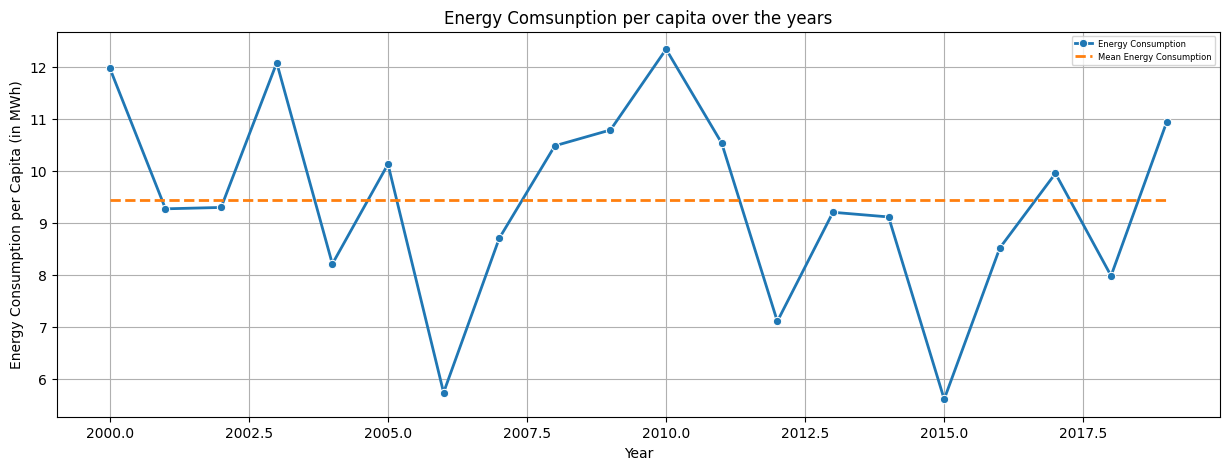

In [14]:
# Plotting Energy Consumption per Capita over the years 
plt.figure(figsize = (15,5))
df_energy = df.copy(deep = True)
df_energy['mean']= df['Energy_Consumption_Per_Capita (in MWh)'].mean()

# Plotting the Energy Consumption per Capita  
sns.lineplot(df_energy, x='Year',y='Energy_Consumption_Per_Capita (in MWh)', errorbar=None, marker="o", label='Energy Consumption', markersize = 6, linewidth = 2)
# Plotting the Mean Line of Energy Consumption per Capita
sns.lineplot(df_energy, x='Year',y='mean', errorbar=None, linestyle="--", label='Mean Energy Consumption', linewidth = 2)

plt.title('Energy Comsunption per capita over the years')
plt.xlabel('Year', fontsize=10)
plt.ylabel('Energy Consumption per Capita (in MWh)', fontsize=10)
plt.legend(fontsize=6)
plt.grid(which='major', visible=True)
plt.savefig('Energy Comsunption per capita over the years')
plt.show()

# Phase 2: Predictive Modeling

## Step 4 - Linear Regression Model (for Pollution Prediction)

In [15]:
# Standarize the dataset
scaler = StandardScaler()
df_scaled = df.drop(columns = ['Country','Year'])
df_scaled = scaler.fit_transform(df_scaled)
df_scaled = pd.DataFrame(df_scaled, columns = df.drop(columns = ['Country','Year']).columns)

# building the model
lin_model = LinearRegression()

# Splitting the dataset into data and target
X = df_scaled.drop(columns = ['Energy_Recovered (in GWh)']).values
Y = df_scaled['Energy_Recovered (in GWh)'].values

# Splitting the data and target into training and testing dataset
x_train_lin, x_test_lin, y_train_lin, y_test_lin = train_test_split(X, Y, test_size=0.2)

# Training the model
lin_model.fit(x_train_lin, y_train_lin)

#Predicting the target values
y_pred_lin = lin_model.predict(x_test_lin)

# Printing the performance metrices
print(f"R2 Score: {round(r2_score(y_test_lin, y_pred_lin),4)}")
print(f"Mean Squared Error Score: {round(mean_squared_error(y_test_lin, y_pred_lin),4)}")
print(f"Mean Absolute Error Score: {round(mean_absolute_error(y_test_lin, y_pred_lin),4)}")


R2 Score: 0.0005
Mean Squared Error Score: 1.0993
Mean Absolute Error Score: 0.921


## Step 5 - Logistic Regression Model (for Categorization of Pollution Levels)

In [16]:
# Creating a deep copy of the original dataset
df_log = df.copy(deep = True)

lower_index = df['Air_Pollution_Index'].quantile(1/4)
higher_index = df['Air_Pollution_Index'].quantile(3/4)

# Function to create category
def category_air_pollution(index):
    if index < lower_index:
        return 'low'
    elif index < higher_index:
        return 'medium'
    else:
        return 'high'

# Adding Severity feature in dataset
df_log['Severity'] = df_log['Air_Pollution_Index'].apply(category_air_pollution)

# Splitting the dataset in data and target sets
X = df_log[['Air_Pollution_Index','CO2_Emissions (in MT)']].values
Y = df_log['Severity'].values


scaler = StandardScaler()
X = scaler.fit_transform(X)

# Splitting the data and target sets into training and testing sets
x_train_log, x_test_log, y_train_log, y_test_log = train_test_split(X, Y, test_size=0.25)

# Creating the model
log_model = LogisticRegression(max_iter=100000)

# Training the model on Data and Target training sets
log_model.fit(x_train_log, y_train_log)

# Predict the target sets based on data test set
y_pred_log = log_model.predict(x_test_log)

# Printing the Performance Metrices
print(f"Accuracy: {round(accuracy_score(y_test_log, y_pred_log)*100, 2)}%")
print(f"Precision: {round(precision_score(y_test_log, y_pred_log, average='weighted')*100, 2)}%")
print(f"Recall: {round(recall_score(y_test_log, y_pred_log, average='weighted')*100, 2)}%")
print(f"F1 Score: {round(f1_score(y_test_log, y_pred_log, average='weighted')*100, 2)}%")

Accuracy: 94.0%
Precision: 94.78%
Recall: 94.0%
F1 Score: 94.0%


# Phase 3: Reporting and Insights

## Step 6 - Model Evaluation and Comparison

### Compare Linear Regression and Logistic Regression models

### 🔍 Model Type & Use Case

| Aspect               | Linear Regression                             | Logistic Regression                            |
|----------------------|-----------------------------------------------|------------------------------------------------|
| **Purpose**          | Predicts **continuous values**                | Predicts **categorical classes**               |
| **Use Case**         | Regression problems (e.g., price prediction)  | Classification problems (e.g., spam detection) |

---

## 📈 Performance Metrics

### Linear Regression
- **R² Score**: `0.0005` 🟡 *(very close to 0 — model explains almost none of the variance)*
- **Mean Squared Error (MSE)**: `1.0993`
- **Mean Absolute Error (MAE)**: `0.921`

> ⚠️ **Interpretation**: Linear Regression is not suitable for this classification task. The low R² and high error metrics indicate poor performance, likely due to the model being applied to a categorical outcome.

---

### Logistic Regression
- **Accuracy**: `94.0%`
- **Precision**: `94.78%`
- **Recall**: `94.0%`
- **F1 Score**: `94.0%`

> ✅ **Interpretation**: Logistic Regression is well-suited for classifying `Severity` into categories. It demonstrates strong performance with high accuracy and balanced precision/recall.

---

## ✅ Final Comparison

| Factor               | Linear Regression                   | Logistic Regression                     |
|----------------------|-------------------------------------|------------------------------------------|
| **Problem Fit**      | ❌ Poor (used for regression)       | ✅ Perfect (used for classification)     |
| **Performance**      | ⚠️ Very low R², high error          | ✅ High accuracy & balanced F1 score     |
| **Suitability**      | ❌ Incorrect model for categories   | ✅ Correct model for `Severity` levels   |

---

### 📌 Conclusion:
> **Logistic Regression** remains the clearly **better and correct model** for this classification problem. While Linear Regression slightly improved (R² ≈ 0), it still **fails to handle categorical targets** and performs poorly. Logistic Regression is **highly accurate and appropriate** for this task.


### Visualize results using confusion matrices and classification reports

##### Visualize Confusion Matrix

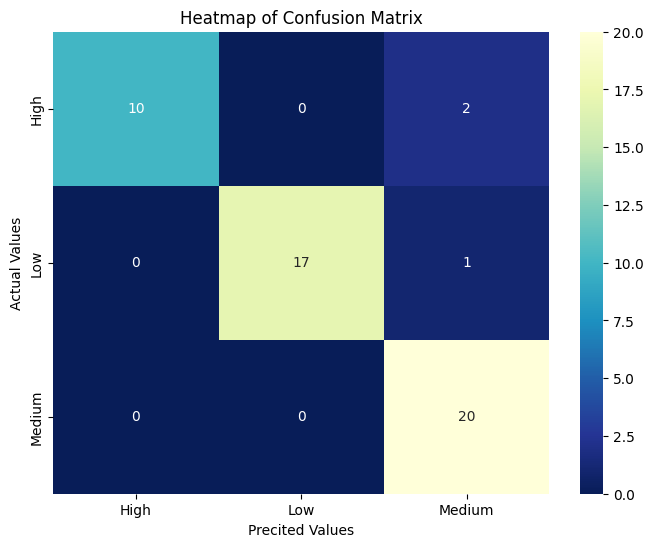

In [17]:
cf_metrix = confusion_matrix(y_test_log, y_pred_log)

plt.figure(figsize = (8,6))
sns.heatmap(data= cf_metrix, annot=True, xticklabels=['High','Low','Medium'], yticklabels=['High','Low','Medium'], cmap='YlGnBu_r')
plt.title("Heatmap of Confusion Matrix")
plt.xlabel('Precited Values')
plt.ylabel('Actual Values')
plt.savefig("Heatmap of Confusion Matrix")
plt.show()

##### Visualize Classification Report

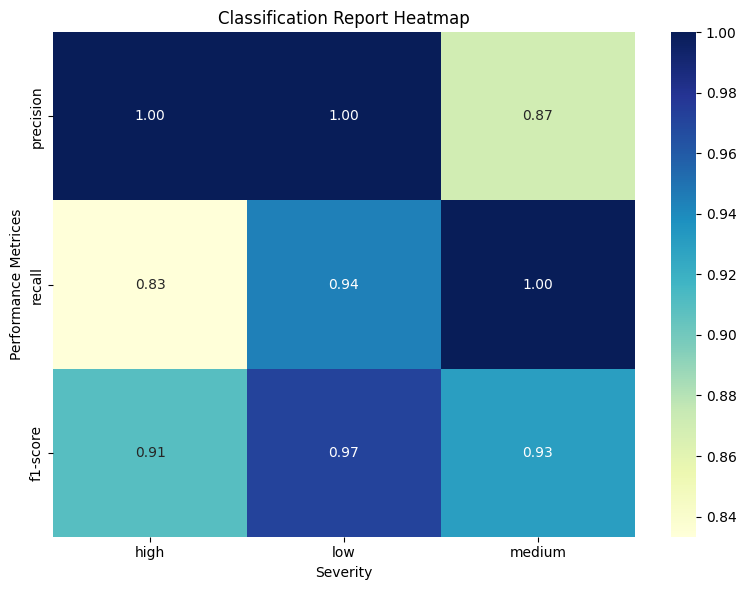

In [20]:
# Creating Classification Report
report = classification_report(y_test_log, y_pred_log, output_dict=True)
report_df = pd.DataFrame(data = report).iloc[:3,:3]

# Plotting the report
plt.figure(figsize=(8, 6))
sns.heatmap(report_df, annot=True, cmap='YlGnBu', fmt=".2f")  # precision, recall, f1-score
plt.title("Classification Report Heatmap")
plt.ylabel('Performance Metrices')
plt.xlabel('Severity')
plt.tight_layout()
plt.savefig("Classification Report Heatmap")
plt.show()

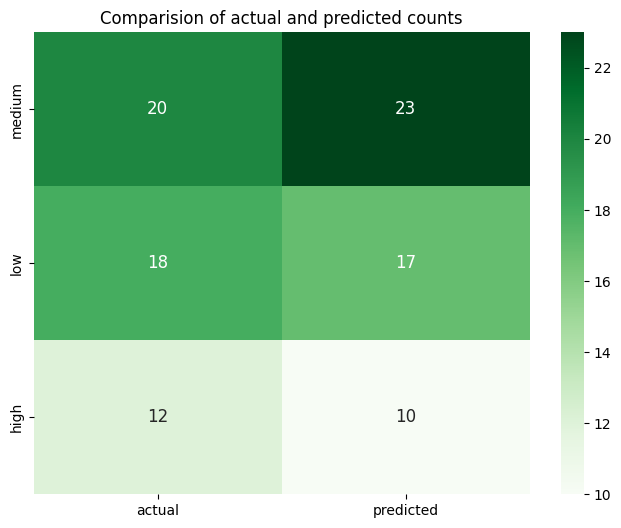

In [22]:
# Getting actual and predicted counts
actual_counts = pd.Series(y_test_log, name='Actual').value_counts()
predicted_counts = pd.Series(y_pred_log, name='Predicted').value_counts()

# Adding them in Dataframe in order to visualize it
count_df = pd.DataFrame({
    'actual' : actual_counts,
    'predicted' : predicted_counts
}).fillna(0).astype(int)

plt.figure(figsize = (8, 6))
sns.heatmap(count_df, annot=True, cmap="Greens", annot_kws={'size': 12})
plt.title('Comparision of actual and predicted counts')
plt.savefig('Comparision of actual and predicted counts')
plt.show()